In [1]:
%run CRLB_for_CRT.ipynb

## Example 1 ##

Determination of CRLB for a scintillator with multiple light-emitting mechanisms.

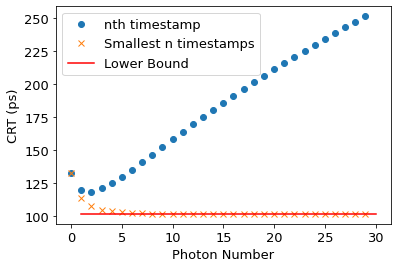

Lower Bound:  101.50707724654272
CRT (first photon triggering):  132.3061900873385


In [5]:
s=(100/2.355)/1000 #Effective transit time spread in terms of a standard deviation. (ns)

tr=[0.05,0.1,0.2] # Rise times for light-emitting mechanisms (ns)
td=[30,80,45] # Decay times for light-emitting mechanisms (ns)
Ppr=[0.6,0.2,0.2] # Probabilities for for light-emitting mechanisms


ne=30 # Number of order statistics to compute
Nsc=2667 # Number of detected scintillation photons

CRT_ordered, CRT_cumulative , Lower_bound = CRLB_for_CRT(s,tr,td,Nsc,Ppr=Ppr,ne=ne,plot=True)
print('Lower Bound: ',Lower_bound)
print('CRT (first photon triggering): ', CRT_ordered[0])

## Example 2 ##

Plotting the CRLB for a range of inputs.

In [2]:
s_values = np.linspace(0.03, 0.1, 15)  # Range for s
tr_values = np.linspace(0.02, 0.2, 15)  # Range for tr
td = [35]
Nsc = 3000
Ppr = [1]
ne = 1

# Initialize the matrix to store only the first element of CRT_ordered
CRT_ordered_matrix = np.zeros((len(tr_values), len(s_values)))

# Compute CRT_ordered for each combination of tr and s
for i, tr in enumerate(tr_values):
    for j, s in enumerate(s_values):
        CRT_ordered, CRT_cumulative, CRT_lower_bound = CRLB_for_CRT(s=s, tr=[tr], td=td, Nsc=Nsc, Ppr=Ppr, ne=ne,plot=False)
        CRT_ordered_matrix[i, j] = CRT_ordered[0]  # Take the first element of CRT_ordered

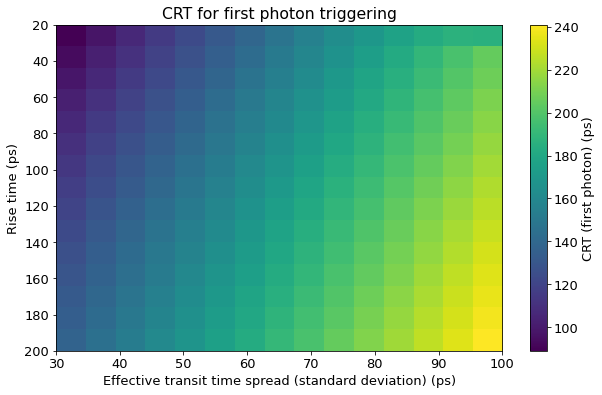

In [3]:
from matplotlib import ticker
plt.rcParams.update({'font.size': 13})

plt.figure(figsize=(10, 6))
plt.imshow(CRT_ordered_matrix, extent=[s_values[0]*1000, s_values[-1]*1000, tr_values[-1]*1000, tr_values[0]*1000],
           aspect='auto', origin='upper', cmap='viridis')
plt.colorbar(label="CRT (first photon) (ps)")
plt.xlabel("Effective transit time spread (standard deviation) (ps)")
plt.ylabel("Rise time (ps)")
plt.title("CRT for first photon triggering")
plt.show()